In [1]:
import sys
!python3 -m  pip install  happybase

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.4/519.4 kB 10.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
  Created wheel for happybase: filename=happybase-1.2.0-py2.py3-none-any.whl size=26603 sha256=e3585a7bab2db55d277d8f19dc70a32187ff0a8097a685bc3d1df65a93a1ae6d
  Stored in directory: /home/jovyan/.cache/pip/wheels/32/d2/d3/81f20bda6dd776416d7846a73b19fb5425198e411ced7822ee
  Created wheel for thriftpy2: filename=thriftpy2-0.4.17-cp311-cp311-linux_x86_64.whl size=685455 sha256=618b1c180fe81b7ec2a84cd3871272d3c4216419edad4bd6837b670cafb7c594
  Stored in directory: /home/jovyan/.cache/pip/wheels/d6/4a/17/a01f28ac7b5b4d5bf3c5276c

In [2]:
import happybase as hb
import pandas  as pd
import matplotlib.pyplot as  plt
import numpy  as np
from datetime import datetime

In [3]:
def create_target(ldf,tr_id=False):
    ldf['SMA1'] = ldf['CANDLESTICKES:close'].rolling(window=10, min_periods=1, center=False).mean() #  short simple moving average window
    ldf['SMA2'] = ldf['CANDLESTICKES:close'].rolling(window=60, min_periods=1, center=False).mean() #  long simple moving average window
    ldf['signal'] = np.where(ldf['SMA1'] > ldf['SMA2'], 1.0, 0.0) # Create signals
    if(tr_id is not True):
        display(ldf['signal'].value_counts())

In [15]:
con = hb.Connection('hbase',9090)
print(con.tables())
con.open()
table  =  con.table('BINANCE')

#candlesticks= [ data for key,data in table.scan(row_prefix=b'ETHUSDT-15m#202311')]
candlesticks= [ data for key,data in table.scan(row_start=b'BTCUSDT-1m#20231031', row_stop=b'BTCUSDT-1m#20231103')]
df_eth= pd.DataFrame(candlesticks).apply(lambda  x: x.apply(lambda  y:  float(y.decode("utf-8").replace('\'',''))))
columns  = [c.decode("utf-8") for c in df_eth.columns]
df_eth.columns =  columns
df_eth['CANDLESTICKES:close_time'] = df_eth['CANDLESTICKES:close_time'].apply(lambda x : int(x)//1000)
df_eth['date'] = df_eth['CANDLESTICKES:close_time'].apply(lambda  x : datetime.fromtimestamp(x))
con.close()

df_eth

[b'BINANCE']


,CANDLESTICKES:close,CANDLESTICKES:close_time,CANDLESTICKES:high,CANDLESTICKES:low,CANDLESTICKES:open,CANDLESTICKES:volume,date
0,34466.94,1698710459,34480.59,34466.73,34474.74,12.17689,2023-10-31 00:00:59
1,34474.72,1698710519,34474.73,34456.95,34466.93,27.03556,2023-10-31 00:01:59
2,34476.51,1698710579,34479.35,34474.72,34474.72,11.77333,2023-10-31 00:02:59
3,34455.35,1698710639,34476.51,34451.21,34476.51,30.25313,2023-10-31 00:03:59
4,34464.98,1698710699,34467.86,34455.35,34455.35,17.25859,2023-10-31 00:04:59
...,...,...,...,...,...,...,...
1435,34647.33,1698796559,34650.00,34626.67,34650.00,16.49533,2023-10-31 23:55:59
1436,34642.58,1698796619,34647.33,34632.64,34647.33,19.42605,2023-10-31 23:56:59
1437,34658.34,1698796679,34658.35,34642.57,34642.57,31.23002,2023-10-31 23:57:59
1438,34658.34,1698796739,34658.35,34658.34,34658.34,13.16276,2023-10-31 23:58:59


In [16]:
create_target(df_eth, tr_id=True)

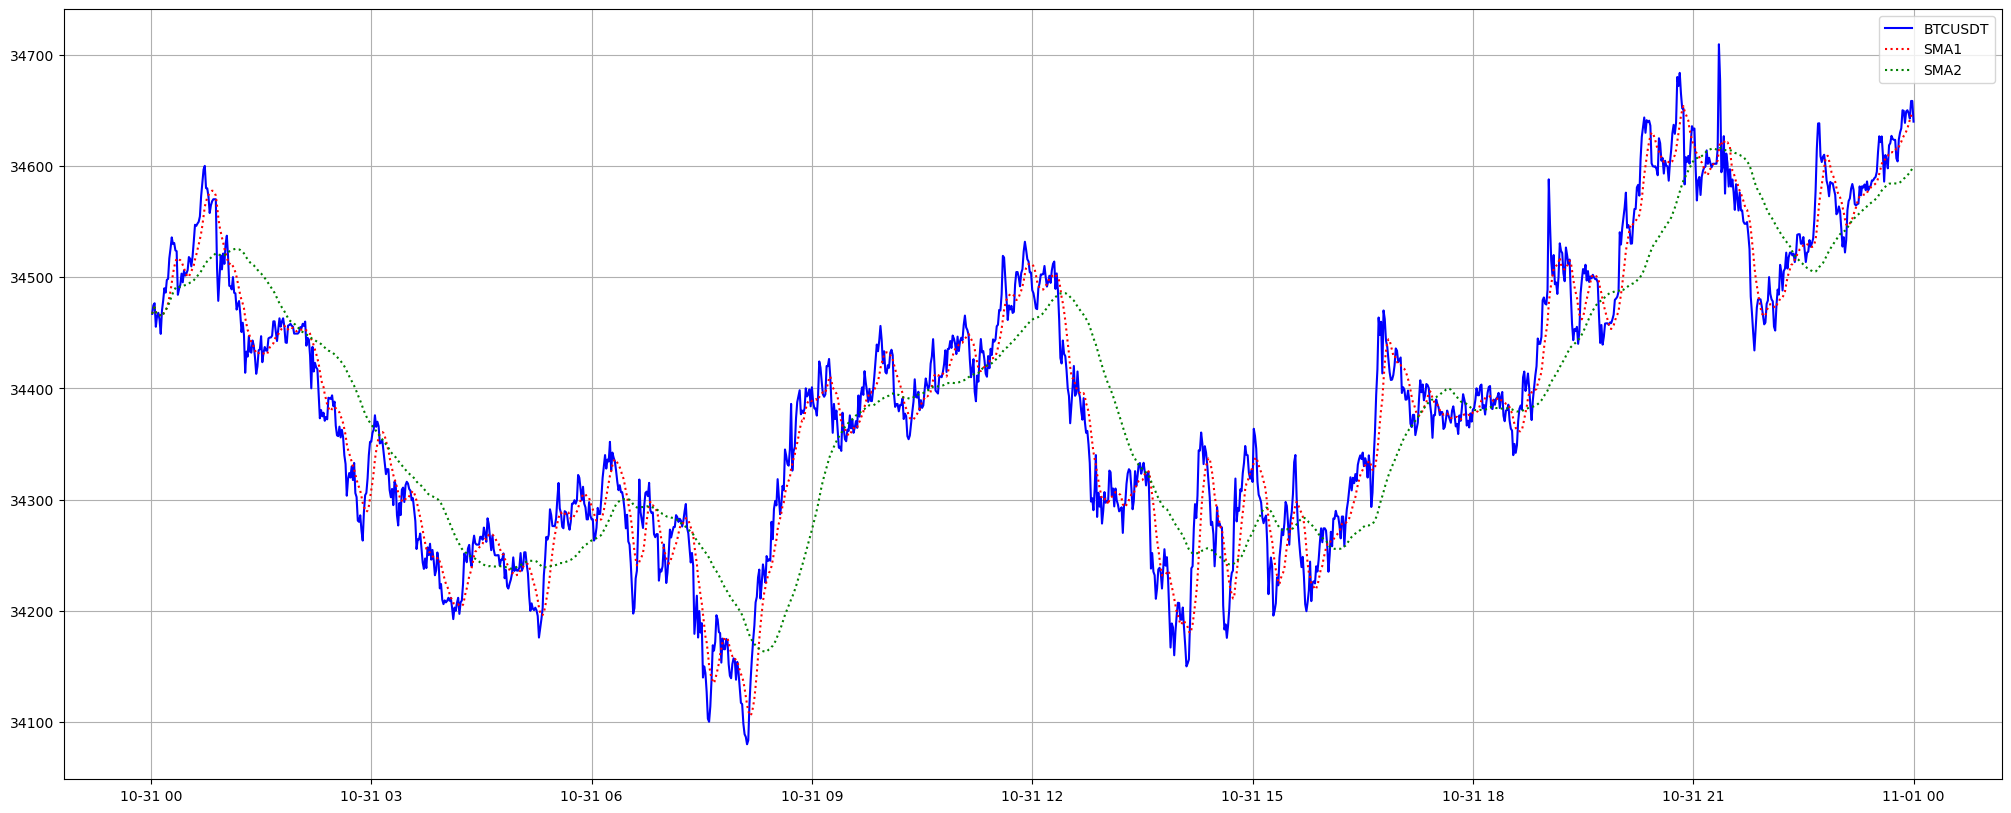

In [17]:
signal_achat = df_eth[df_eth['signal'] > 0]

plt.figure(figsize=(25,10))
plt.plot(df_eth['date'], df_eth['CANDLESTICKES:close'], label='BTCUSDT', color='b', linestyle='-',   linewidth=1.5)
plt.plot(df_eth['date'], df_eth['SMA1'], label='SMA1', color='r', linestyle=':')
plt.plot(df_eth['date'], df_eth['SMA2'], label='SMA2', color='g', linestyle=':')
#plt.scatter(signal_achat['date'], signal_achat['CANDLESTICKES:close'],  marker='v', color='r')
plt.xlabel = 'Année 2020'
plt.ylabel = 'prix'
plt.title = 'Evolution'
plt.legend()
plt.grid(True)
plt.show()